In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
cars = pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
print(cars.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [3]:
cars["brand"] = cars["name"].agg(str.split).str[0]
print(cars["brand"].value_counts())

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64


<BarContainer object of 29 artists>

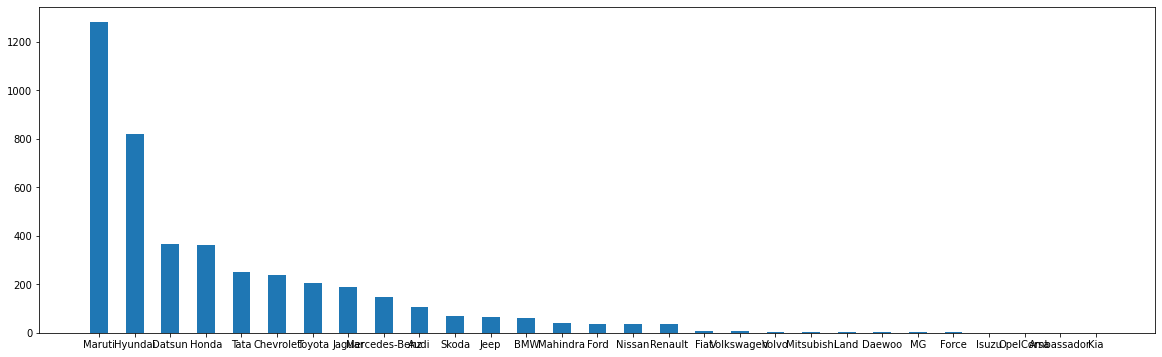

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(cars["brand"].unique(), cars["brand"].value_counts(),width=0.5)

In [5]:
print(cars.info())
cars_train = cars[["year", "km_driven", "fuel", "seller_type", "transmission", "brand", "owner"]]
print(cars["brand"].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB
None
0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: brand, dtype: object


In [6]:
from sklearn import preprocessing

In [7]:
print(cars_train["seller_type"].unique())
le_seller = preprocessing.LabelEncoder()
le_seller.fit(cars_train["seller_type"])
cars_train["seller_type"] = le_seller.transform(cars_train["seller_type"])
print(cars_train["seller_type"].head())

['Individual' 'Dealer' 'Trustmark Dealer']
0    1
1    1
2    1
3    1
4    1
Name: seller_type, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
print(cars_train["transmission"].unique())
le_trans = preprocessing.LabelEncoder()
le_trans.fit(cars_train["transmission"])
cars_train["transmission"] = le_trans.transform(cars_train["transmission"])
print(cars_train["transmission"].head())

['Manual' 'Automatic']
0    1
1    1
2    1
3    1
4    1
Name: transmission, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
print(cars_train["fuel"].unique())
le_fuel = preprocessing.LabelEncoder()
le_fuel.fit(cars_train["fuel"])
cars_train["fuel"] = le_fuel.transform(cars_train["fuel"])
print(cars_train["fuel"].head())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
0    4
1    4
2    1
3    4
4    1
Name: fuel, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
print(cars_train["owner"].unique())
le_owner = preprocessing.LabelEncoder()
le_owner.fit(cars_train["owner"])
cars_train["owner"] = le_owner.transform(cars_train["owner"])
print(cars_train["owner"].head())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
0    0
1    0
2    0
3    0
4    2
Name: owner, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
le_brand = preprocessing.LabelEncoder()
le_brand.fit(cars_train["brand"])
cars_train["brand"] = le_brand.transform(cars_train["brand"])
print(cars_train["brand"].head())

0    18
1    18
2    10
3     5
4     9
Name: brand, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
y = cars["selling_price"]
print(y.shape)
X = cars_train
print(X.shape)

(4340,)
(4340, 7)


In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#initialise models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

#import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

In [15]:
LR = LinearRegression()
xgb = XGBRegressor()
xgbParams = {"eta":[0.0001, 0.001, 0.01, 0.1, 1],
            "max_depth":[3, 4, 5]}
xgbGrid = GridSearchCV(xgb, xgbParams, scoring="r2", cv=kf)

In [16]:
NN = Sequential([
    Dense(units=7,activation="relu"),
    Dense(units=4, activation="relu"),
    Dense(units=1, activation="linear")
])
NN.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01))

2022-10-30 09:28:34.632096: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
#fit all models
LR.fit(X_train, y_train)
y_LR_pred = LR.predict(X_test)
print(y_LR_pred.shape)
print("Cross validation scores across 3-fold splits: {}".format(cross_val_score(LR, X_train, y_train, cv=kf, scoring="r2")))

(868,)
Cross validation scores across 3-fold splits: [0.44524731 0.44270244 0.4771286 ]


In [18]:
xgbGrid.fit(X_train, y_train)
ideal = xgbGrid.best_params_
print("Ideal params for eta and max_depth after GridSearchCV: {}".format(ideal))

Ideal params for eta and max_depth after GridSearchCV: {'eta': 0.1, 'max_depth': 4}


In [19]:
xgbBest = XGBRegressor(booster="gbtree", eta=0.1, max_depth=5)
xgbBest.fit(X_train, y_train)
y_xgb_pred = xgbBest.predict(X_test)
print("Cross validation scores across 3-fold splits: {}".format(cross_val_score(xgbBest, X_train, y_train, cv=kf, scoring="r2")))

Cross validation scores across 3-fold splits: [0.81371498 0.70051009 0.80791291]


In [20]:
NN.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


2022-10-30 09:28:51.187138: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


55/55 [==============================] - 1s 1ms/step - loss: 467538870272.0000
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 422969737216.0000
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 411324809216.0000
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: 393049931776.0000
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 367596797952.0000
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 333671170048.0000
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 303753625600.0000
Epoch 8/100
55/55 [==============================] - 0s 1ms/step - loss: 291590766592.0000
Epoch 9/100
55/55 [==============================] - 0s 1ms/step - loss: 284932866048.0000
Epoch 10/100
55/55 [==============================] - 0s 1ms/step - loss: 283246362624.0000
Epoch 11/100
55/55 [==============================] - 0s 1ms/step - loss: 282710900736.0000
Epoch 12/

In [21]:
y_nn_pred = NN.predict(X_test)
print("R2 score: {}".format(r2_score(y_test, y_nn_pred)))

R2 score: 0.06877139390532505


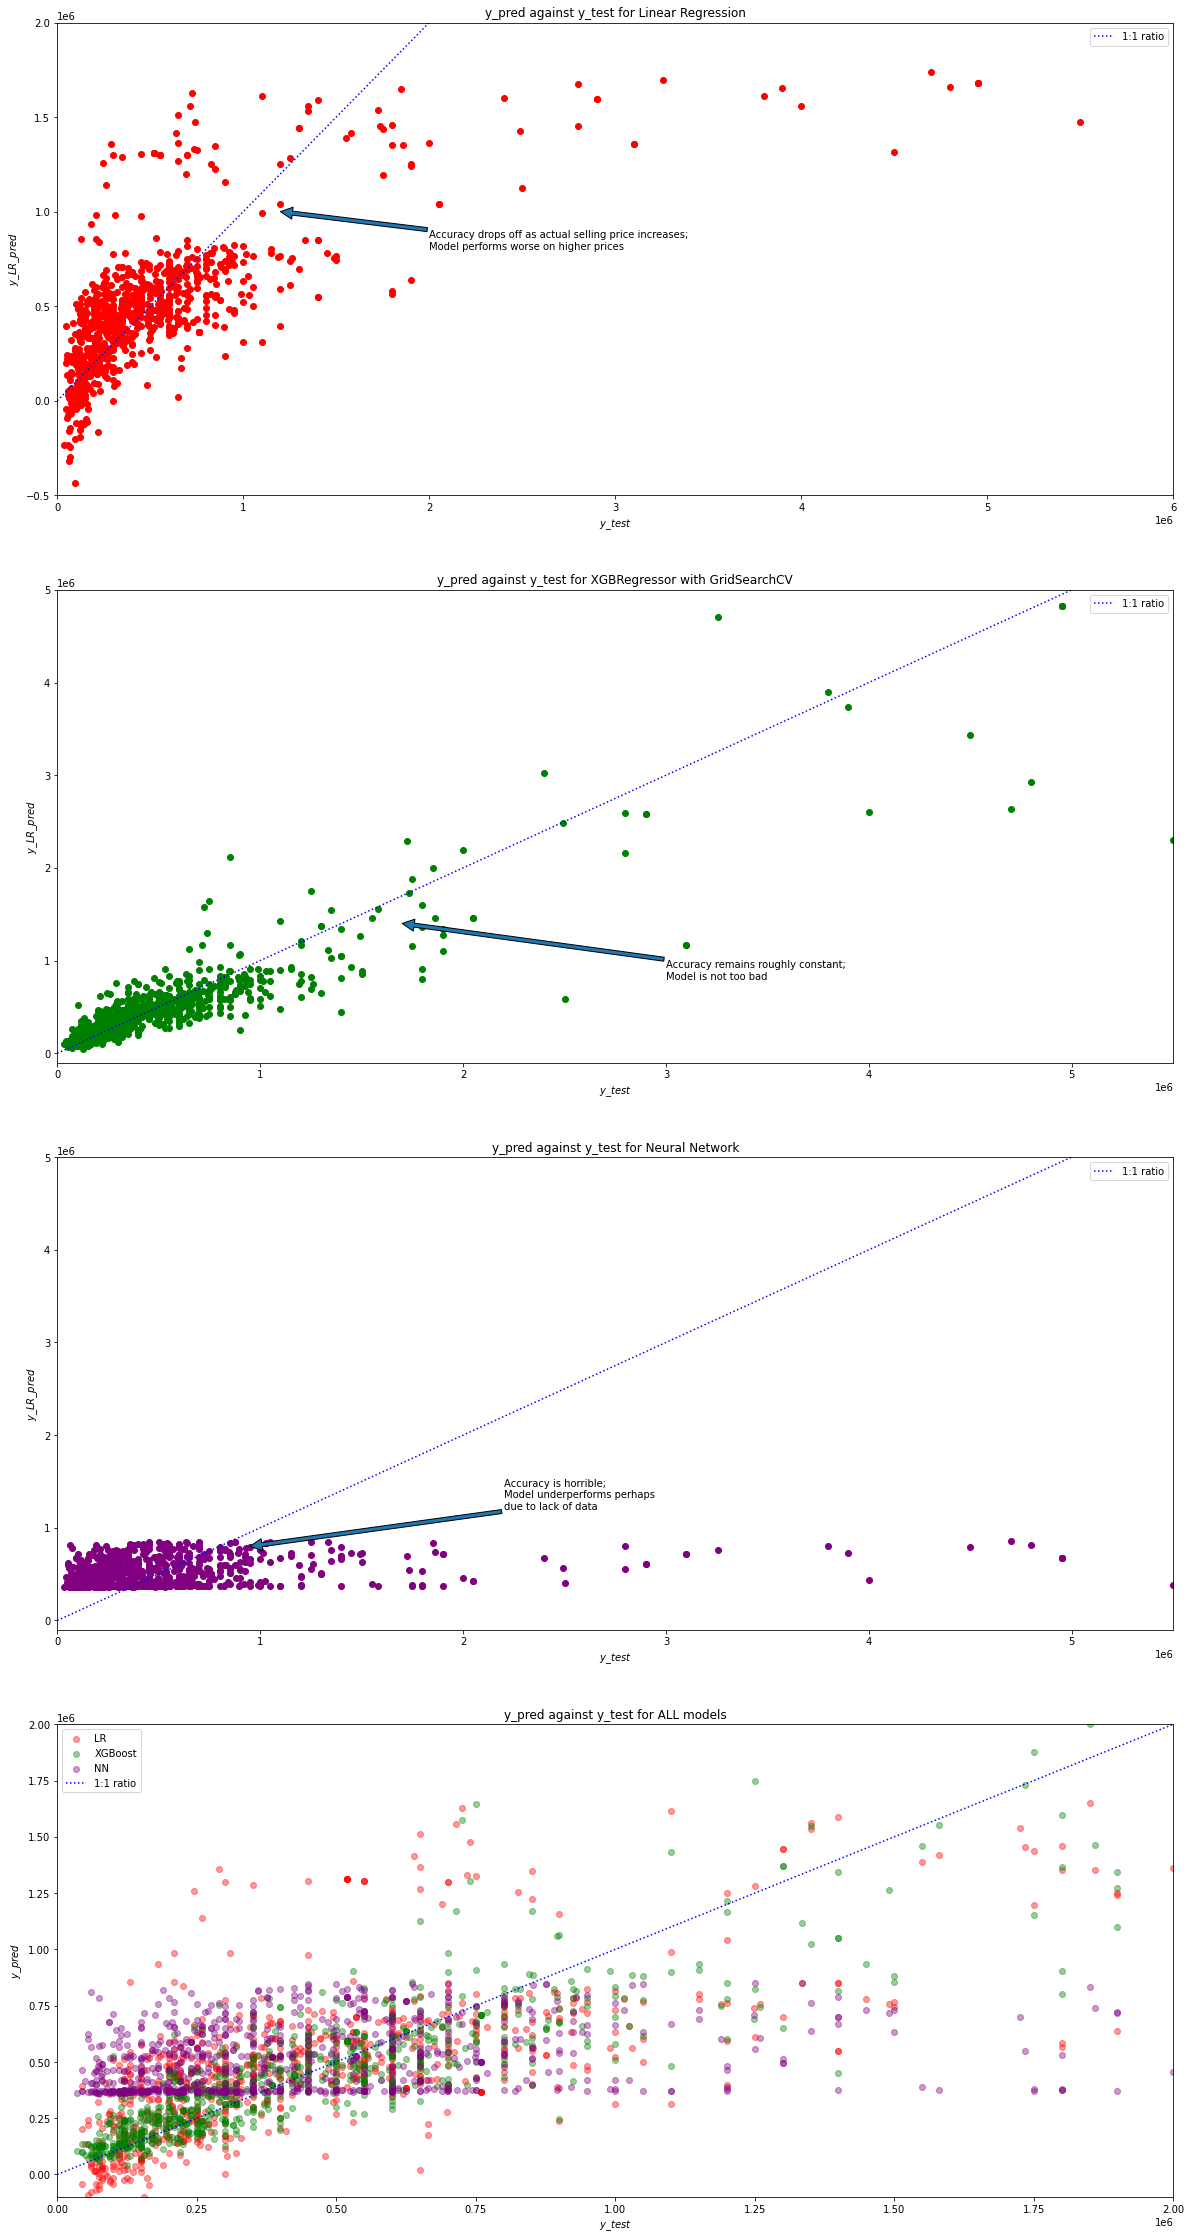

In [22]:
#Evaluate y_pred against y_test for all:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,40))

ax1.set_title("y_pred against y_test for Linear Regression")
ax1.scatter(y_test, y_LR_pred, color="red")
ax1.plot([0,6e6], [0,6e6], color="blue", linestyle="dotted", label="1:1 ratio")
ax1.set_ylim(-0.5e6, 2e6)
ax1.set_xlim(0, 6e6)
ax1.set_ylabel("$y\_LR\_pred$")
ax1.set_xlabel("$y\_test$")
ax1.annotate("Accuracy drops off as actual selling price increases;\nModel performs worse on higher prices",
            xy=(1.2e6, 1e6), xytext=(2e6, 0.8e6), arrowprops={})
ax1.legend()

ax2.set_title("y_pred against y_test for XGBRegressor with GridSearchCV")
ax2.scatter(y_test, y_xgb_pred, color="green")
ax2.plot([0,6e6], [0,6e6], color="blue", linestyle="dotted", label="1:1 ratio")
ax2.set_ylim(-0.1e6, 5e6)
ax2.set_xlim(0, 5.5e6)
ax2.set_ylabel("$y\_LR\_pred$")
ax2.set_xlabel("$y\_test$")
ax2.annotate("Accuracy remains roughly constant;\nModel is not too bad",
            xy=(1.7e6, 1.4e6), xytext=(3e6, 0.8e6), arrowprops={})
ax2.legend()

ax3.set_title("y_pred against y_test for Neural Network")
ax3.scatter(y_test, y_nn_pred, color="purple")
ax3.plot([0,6e6], [0,6e6], color="blue", linestyle="dotted", label="1:1 ratio")
ax3.set_ylim(-0.1e6, 5e6)
ax3.set_xlim(0, 5.5e6)
ax3.set_ylabel("$y\_LR\_pred$")
ax3.set_xlabel("$y\_test$")
ax3.annotate("Accuracy is horrible;\nModel underperforms perhaps\ndue to lack of data",
            xy=(0.95e6, 0.8e6), xytext=(2.2e6, 1.2e6), arrowprops={})
ax3.legend()

ax4.set_title("y_pred against y_test for ALL models")
ax4.scatter(y_test, y_LR_pred, color="red", alpha=0.4, label="LR")
ax4.scatter(y_test, y_xgb_pred, color="green", alpha=0.4, label="XGBoost")
ax4.scatter(y_test, y_nn_pred, color="purple", alpha=0.4, label="NN")
ax4.plot([0,6e6], [0,6e6], color="blue", linestyle="dotted", label="1:1 ratio")
ax4.set_ylim(-0.1e6, 2e6)
ax4.set_xlim(0, 2e6)
ax4.set_ylabel("$y\_pred$")
ax4.set_xlabel("$y\_test$")
ax4.legend()